# Electrical characteristic analysis of sample CA12X2_C1

In [12]:
paths = ['../CA12X2_C1/CA12X2_C1_current_from_0.5e-6_to_1e-6A/CA12X2_C1_current_from_0.5e-6_to_1e-6A-20220428154754',
        '../CA12X2_C1/CA12X2_C1_current_from_1e-7_to_1e-6A/CA12X2_C1_current_from_1e-7_to_1e-6A-20220428162518']

#Select the experiment from list of the paths, eg. paths[0] picks the first experiment, paths[1] the second one and so on 
data_path = paths[1]

with open(data_path, "r", encoding='utf-8') as file_desc:
    text = file_desc.read()
    print(text)

Electrical characterization experiment of current biased Ca2RuO4 crystal along C-axis as a function of temperature with 2-wire connection.
Name of the sample: CA12X2_C1
Area: 5.908e-2cm2
Length: 0.583e-1cm
Current source from 1e-7A to 1e-6A

### Experiment 20220428162518 ###
Date 2022-04-28 start at 15:48:31 end at 16:25:12 duration 0:36:41
Temperature range from 98.07°K to 88.06°K
Resistivity:
	 average 1.7741e+07𝛀 cm
	 minimum 8.1813e+06𝛀 cm at 97.69°K
	 maximum 1.0382e+08𝛀 cm at 88.61°K
Voltage:
	 average 6.7639e+00V
	 minimum 1.1061e+00V at 88.60°K
	 maximum 1.1964e+01V at 98.01°K


<img style="float:left" src="../CA12X2_C1/CA12X2_C1_Info/ca12x2_c1_deposizione_argento.jpeg" width=300 />
<img src="../CA12X2_C1/CA12X2_C1_Info/ca12x2_c1-montaggio_20220428.jpeg" width=300 />

## Annotation

Il campione presenta inclusioni di rutenio metallico rilevate al microscopio ottico, non è stata fatta un'analisi diffrattometrica ai raggi X. Per il collegamento elettrico sono state create due piazzole conduttive depositando su entrambe le facce Ag con il metodo della polverizzazione catodica per la durata di 4 minuti, con Argon alla pressione di lavoro di 8 10-2 torr e voltaggio di 1,9kV. Per delineare le piazzole è stato usato sperimentalmente un foglio di paraffina, PARAFILM. I contatti sono stati realizzati con una diversa pasta d'argento.
Resistenza iniziale è di circa 40 Ohm a temperatura ambiente, resistenza misurata allo smontaggio dal discendente è di circa 49.6 Ohm a temperatura ambiente. Il campione allo smontaggio risulta integro.

## Loading experiment data

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from datetime import datetime

plt.rcParams['figure.figsize'] = [20, 6]

In [14]:
data = np.load(data_path + '.npz', allow_pickle=True)
datetime_data = data['datetime']
voltage_data = data['voltage']
resistance_data = data['resistance']
temperature_data = data['temperature']
source_data = data['current_source']
c_density_data = data['current_density']
e_field_data = data['electric_field']
resistivity_data = data['resistivity']
thickness = voltage_data/e_field_data
area = source_data/c_density_data
# Density in mA/cm2
c_density_data = c_density_data * 1000

### Data description

- DT datetime
- V voltage measurements in Volts
- R resistance measurements in Ohm
- T temperature measurements in °K
- I current source in Amps
- J current density in mA/cm^2
- E electric field in V/cm
- RHO resistivity in Ohm cm

In [15]:
print(f"Area {area[0]:.4e}cm2\nThickness:{thickness[0]:.4e}cm")

Area 5.9080e-02cm2
Thickness:5.8300e-02cm


### Temperature

In [16]:
temp_msg = ""
temp_const = True
diff = np.max(temperature_data) - np.min(temperature_data)
if diff <= 0.1: 
    temp_msg = f"Temperature is constant: {temperature_data[0]:.2f}°K"   
elif diff <= 1.5: 
    temp_msg = f"Temperature is quite constant, average value: {np.average(temperature_data):.2f}°K difference between min and max {np.max(temperature_data) - np.min(temperature_data):.2f}°K"
else:
    temp_msg = f"Temperature span from {np.min(temperature_data):.2f}°K to {np.max(temperature_data):.2f}°K"
    temp_const = False
print(temp_msg)

Temperature span from 88.06°K to 98.07°K


### Input source

In [17]:
source_msg = ""
source_const = True
if source_data[0] == source_data[-1]: 
    source_msg = f"Source is constant: {source_data[0]:.2e}A ({c_density_data[0]:.2e}mA/cm2)"
else:
    source_msg = f"Source span from {np.min(source_data):.2e}A ({np.min(c_density_data):.2e}mA/cm2) to {np.max(source_data):.2e}A ({np.max(c_density_data):.2e}mA/cm2)"
    source_const = False
print(source_msg)

Source span from 1.00e-07A (1.69e-03mA/cm2) to 1.00e-06A (1.69e-02mA/cm2)


In [18]:
DT = datetime_data[0:-1]
T = temperature_data[0:-1]
J = c_density_data[0:-1]
RHO = resistivity_data[0:-1]
E = e_field_data[0:-1]

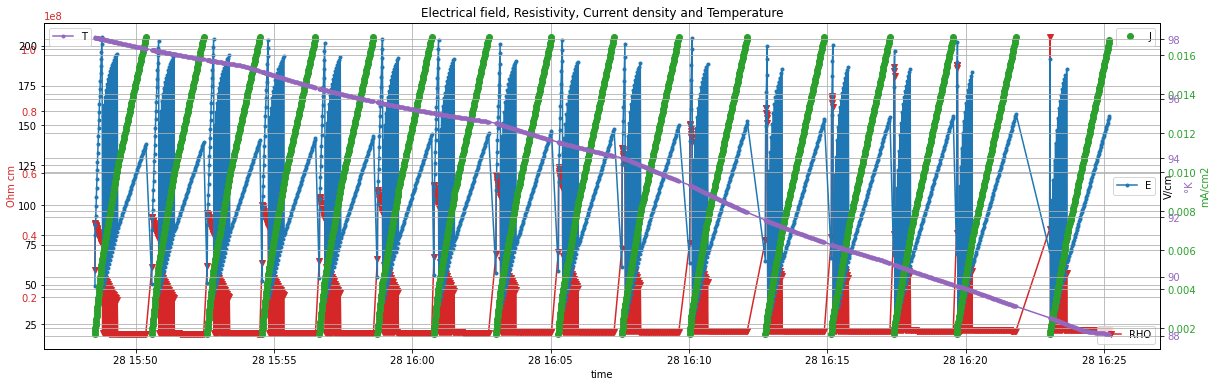

In [19]:
fig, ax1 = plt.subplots()
ax1.set_title("Electrical field, Resistivity, Current density and Temperature")
ax1.set_xlabel('time')
ax1.set_ylabel('Ohm cm', color='C3')
ax1.tick_params(axis='y', labelcolor='C3')
ax1.plot(DT, RHO, 'v-', color='C3', label='RHO')
ax2 = ax1.twinx()
ax2.set_ylabel('V/cm')
ax2.plot(DT, E, '.-', label='E')
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
ax3 = ax1.twinx()
ax4 = ax2.twinx()
if not temp_const:
    ax4.set_ylabel('°K', color='C4')
    ax4.tick_params(axis='y', labelcolor='C4')
    ax4.plot(DT, T, '.-', label='T', color='C4')
    ax4.legend(loc='upper left')

if not source_const:
    ax3.set_ylabel('mA/cm2', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, J, 'o', label='J', color='C2')
    ax3.legend(loc='upper right')

ax1.legend(loc='lower right')
ax2.legend(loc='right')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

## Slices

In [20]:
slices, = np.where(source_data == np.min(source_data))
for i in range(0,len(slices)-1):
    print(f"Slice {i+1} from {slices[i]} to {slices[i+1]}")
print(f"Slice {len(slices)} from {slices[-1]} to {len(source_data)}")

Slice 1 from 0 to 100
Slice 2 from 100 to 200
Slice 3 from 200 to 300
Slice 4 from 300 to 400
Slice 5 from 400 to 500
Slice 6 from 500 to 600
Slice 7 from 600 to 700
Slice 8 from 700 to 800
Slice 9 from 800 to 900
Slice 10 from 900 to 1000
Slice 11 from 1000 to 1100
Slice 12 from 1100 to 1200
Slice 13 from 1200 to 1300
Slice 14 from 1300 to 1400
Slice 15 from 1400 to 1500
Slice 16 from 1500 to 1600


## Analysis of the 1st slice

In [21]:
DT = datetime_data[slices[0]:slices[1]]
T = temperature_data[slices[0]:slices[1]]
J = c_density_data[slices[0]:slices[1]]
RHO = resistivity_data[slices[0]:slices[1]]
E = e_field_data[slices[0]:slices[1]]

In [22]:
temp_const = True
diff = np.max(T) - np.min(T)
if diff <= 0.1: 
    temp_msg = f"Temperature is constant: {T[0]:.2f}°K"   
elif diff <= 1.5: 
    temp_msg = f"Temperature is quite constant, average value: {np.average(T):.2f}°K difference between min and max {np.max(T) - np.min(T):.2f}°K"
else:
    temp_msg = f"Temperature span from {np.min(T):.2f}°K to {np.max(T):.2f}°K"
    temp_const = False
print(temp_msg)

Temperature is quite constant, average value: 97.90°K difference between min and max 0.38°K


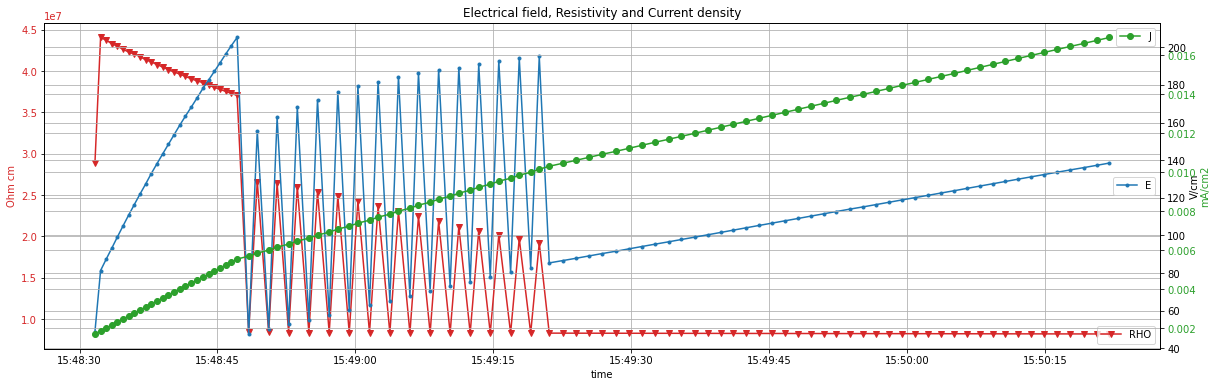

In [23]:
fig, ax1 = plt.subplots()
ax1.set_title("Electrical field, Resistivity and Current density")
ax1.set_xlabel('time')
ax1.set_ylabel('Ohm cm', color='C3')
ax1.tick_params(axis='y', labelcolor='C3')
ax1.plot(DT, RHO, 'v-', color='C3', label='RHO')
ax2 = ax1.twinx()
ax2.set_ylabel('V/cm')
ax2.plot(DT, E, '.-', label='E')
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
ax3 = ax1.twinx()

if not temp_const:
    ax3.set_ylabel('°K', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, T, 'o-', label='T', color='C2')
    ax3.legend(loc='upper right')

if not source_const:
    ax3.set_ylabel('mA/cm2', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, J, 'o-', label='J', color='C2')
    ax3.legend(loc='upper right')

ax1.legend(loc='lower right')
ax2.legend(loc='right')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

### Peaks detection

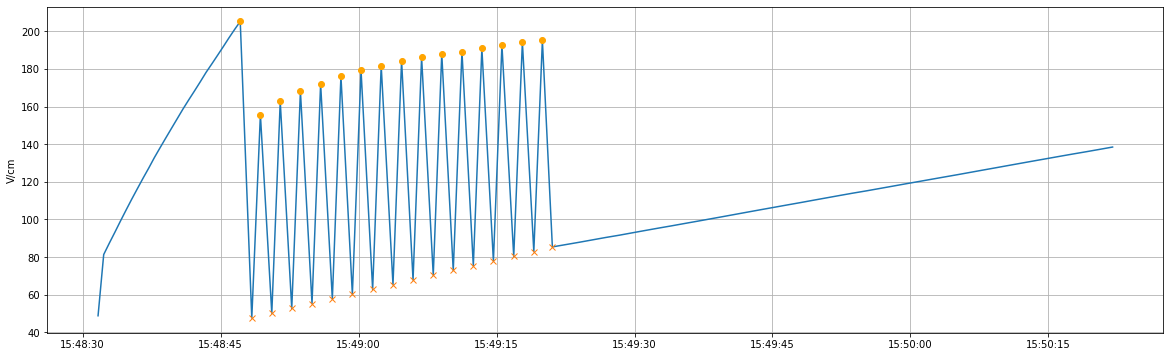

In [24]:
# Individuazione dei picchi
peaks, _ = signal.find_peaks(E, prominence=50)
# Larghezza, Ampiezza base, inizio e fine dei picchi
widths, values, start, end = signal.peak_widths(E, peaks, rel_height=1)
plt.plot(DT, E)
plt.plot(DT[peaks], E[peaks], 'o', c='orange')
istart = np.rint(start)
iend = np.rint(end)
plt.plot(DT[iend.astype(int)], E[iend.astype(int)], 'x')
#plt.hlines(values, DT[istart.astype(int)], DT[iend.astype(int)], color="C3")
plt.ylabel('V/cm')
plt.grid(True)

#### Starting and ending point of the peaks

In [25]:
print(f"First peak with value {E[peaks[0]]:.1f} V/cm, {RHO[peaks[0]]:.3e} Ohm cm at T:{T[peaks[0]]:.2f}°K and J:{J[peaks[0]]:.3e} mA/cm2\
\nLast peak  with value {E[peaks[-1]]:.1f} V/cm, {RHO[peaks[-1]]:.2e} Ohm cm at T:{T[peaks[-1]]:.2f}°K and J:{J[peaks[-1]]:.3e} mA/cm2")

First peak with value 205.2 V/cm, 3.705e+07 Ohm cm at T:98.01°K and J:5.539e-03 mA/cm2
Last peak  with value 195.1 V/cm, 1.92e+07 Ohm cm at T:97.90°K and J:1.016e-02 mA/cm2


#### Peaks amplitude

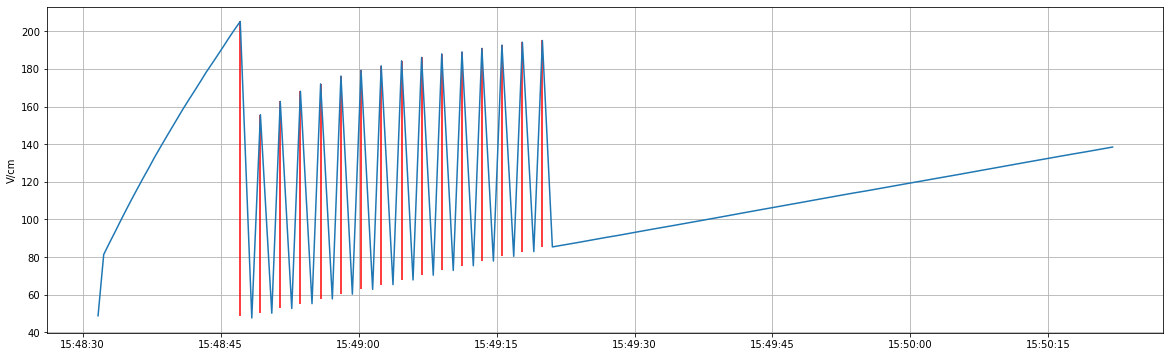

In [26]:
plt.plot(DT, E)
plt.vlines(DT[peaks], values, E[peaks], color='red')
plt.ylabel('V/cm')
plt.grid(True)

In [27]:
diff = E[peaks]-values
print(f"Minimum amplitude {np.min(diff):.1f} V/cm at T:{T[np.argmin(diff)]:.2f}°K and J:{J[np.argmin(diff)]:.3e} mA/cm2\
      \nMaximum amplitude {np.max(diff):.1f} at V/cm at T:{T[np.argmax(diff)]:.2f}°K and J:{J[np.argmax(diff)]:.3e} mA/cm2\
      \nAverage amplitude {np.mean(diff):.1f} V/cm")

Minimum amplitude 105.5 V/cm at T:98.07°K and J:1.846e-03 mA/cm2      
Maximum amplitude 156.4 at V/cm at T:98.07°K and J:1.693e-03 mA/cm2      
Average amplitude 115.9 V/cm


#### Time interval between peaks [ms]

Average 2190 milliseconds


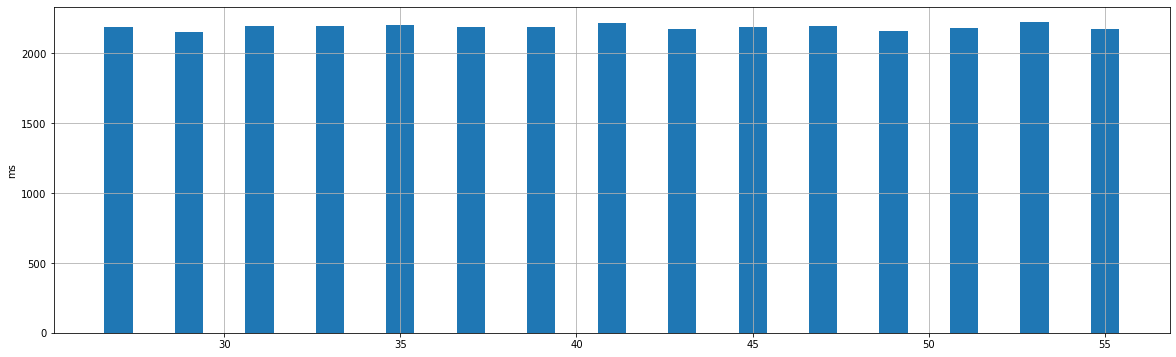

In [28]:
diff = np.ediff1d(DT[peaks].astype(dtype='datetime64[ms]'))
plt.ylabel('ms')
plt.bar(peaks[1:], diff.astype(int))
plt.grid(True)
print(f"Average {np.mean(diff)}")

## Analysis of the 2nd slice

In [29]:
DT = datetime_data[slices[1]:slices[2]]
T = temperature_data[slices[1]:slices[2]]
J = c_density_data[slices[1]:slices[2]]
RHO = resistivity_data[slices[1]:slices[2]]
E = e_field_data[slices[1]:slices[2]]

In [30]:
temp_const = True
diff = np.max(T) - np.min(T)
if diff <= 0.1: 
    temp_msg = f"Temperature is constant: {T[0]:.2f}°K"   
elif diff <= 1.5: 
    temp_msg = f"Temperature is quite constant, average value: {np.average(T):.2f}°K difference between min and max {np.max(T) - np.min(T):.2f}°K"
else:
    temp_msg = f"Temperature span from {np.min(T):.2f}°K to {np.max(T):.2f}°K"
    temp_const = False
print(temp_msg)

Temperature is quite constant, average value: 97.51°K difference between min and max 0.32°K


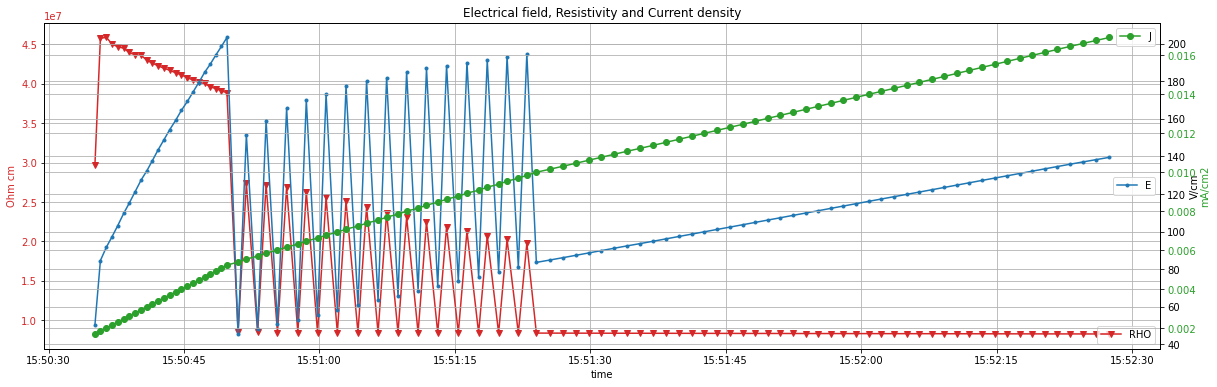

In [31]:
fig, ax1 = plt.subplots()
ax1.set_title("Electrical field, Resistivity and Current density")
ax1.set_xlabel('time')
ax1.set_ylabel('Ohm cm', color='C3')
ax1.tick_params(axis='y', labelcolor='C3')
ax1.plot(DT, RHO, 'v-', color='C3', label='RHO')
ax2 = ax1.twinx()
ax2.set_ylabel('V/cm')
ax2.plot(DT, E, '.-', label='E')
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
ax3 = ax1.twinx()

if not temp_const:
    ax3.set_ylabel('°K', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, T, 'o-', label='T', color='C2')
    ax3.legend(loc='upper right')

if not source_const:
    ax3.set_ylabel('mA/cm2', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, J, 'o-', label='J', color='C2')
    ax3.legend(loc='upper right')

ax1.legend(loc='lower right')
ax2.legend(loc='right')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

### Peaks detection

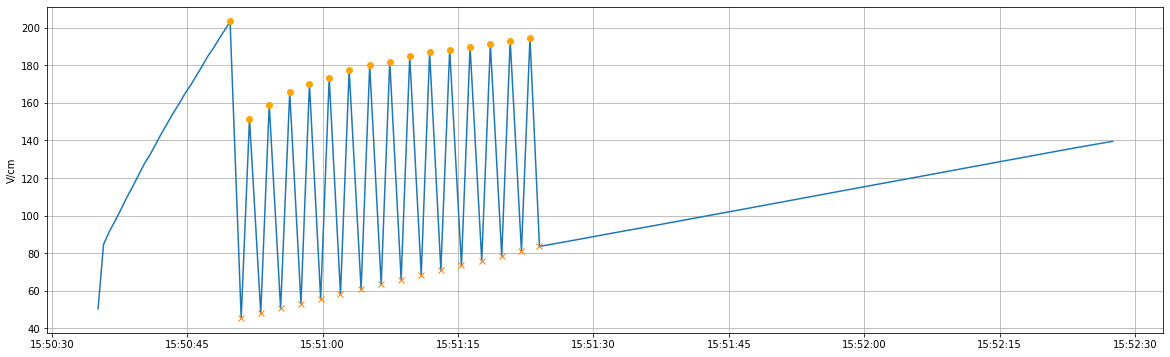

In [32]:
# Individuazione dei picchi
peaks, _ = signal.find_peaks(E, prominence=50)
# Larghezza, Ampiezza base, inizio e fine dei picchi
widths, values, start, end = signal.peak_widths(E, peaks, rel_height=1)
plt.plot(DT, E)
plt.plot(DT[peaks], E[peaks], 'o', c='orange')
istart = np.rint(start)
iend = np.rint(end)
plt.plot(DT[iend.astype(int)], E[iend.astype(int)], 'x')
#plt.hlines(values, DT[istart.astype(int)], DT[iend.astype(int)], color="C3")
plt.ylabel('V/cm')
plt.grid(True)

#### Starting and ending point of the peaks

In [33]:
print(f"First peak with value {E[peaks[0]]:.1f} V/cm, {RHO[peaks[0]]:.3e} Ohm cm at T:{T[peaks[0]]:.2f}°K and J:{J[peaks[0]]:.3e} mA/cm2\
\nLast peak  with value {E[peaks[-1]]:.1f} V/cm, {RHO[peaks[-1]]:.2e} Ohm cm at T:{T[peaks[-1]]:.2f}°K and J:{J[peaks[-1]]:.3e} mA/cm2")

First peak with value 203.3 V/cm, 3.886e+07 Ohm cm at T:97.60°K and J:5.232e-03 mA/cm2
Last peak  with value 194.7 V/cm, 1.98e+07 Ohm cm at T:97.50°K and J:9.848e-03 mA/cm2


#### Peaks amplitude

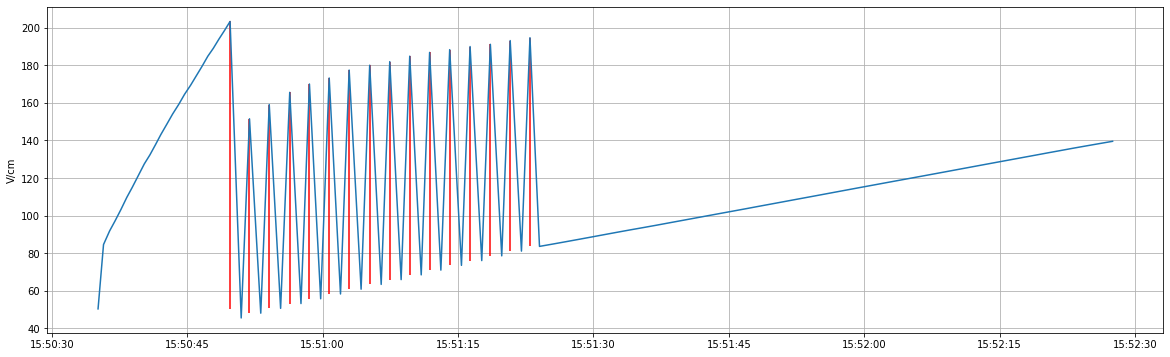

In [34]:
plt.plot(DT, E)
plt.vlines(DT[peaks], values, E[peaks], color='red')
plt.ylabel('V/cm')
plt.grid(True)

In [35]:
diff = E[peaks]-values
print(f"Minimum amplitude {np.min(diff):.1f} V/cm at T:{T[np.argmin(diff)]:.2f}°K and J:{J[np.argmin(diff)]:.3e} mA/cm2\
      \nMaximum amplitude {np.max(diff):.1f} at V/cm at T:{T[np.argmax(diff)]:.2f}°K and J:{J[np.argmax(diff)]:.3e} mA/cm2\
      \nAverage amplitude {np.mean(diff):.1f} V/cm")

Minimum amplitude 103.5 V/cm at T:97.65°K and J:1.846e-03 mA/cm2      
Maximum amplitude 153.0 at V/cm at T:97.65°K and J:1.693e-03 mA/cm2      
Average amplitude 115.8 V/cm


#### Time interval between peaks [ms]

Average 2214 milliseconds


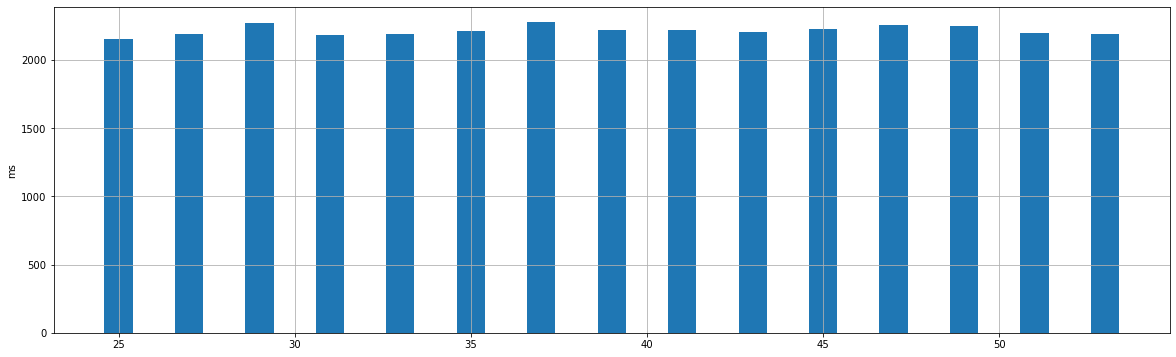

In [36]:
diff = np.ediff1d(DT[peaks].astype(dtype='datetime64[ms]'))
plt.ylabel('ms')
plt.bar(peaks[1:], diff.astype(int))
plt.grid(True)
print(f"Average {np.mean(diff)}")

## Analysis of the 3rd slice

In [37]:
DT = datetime_data[slices[2]:slices[3]]
T = temperature_data[slices[2]:slices[3]]
J = c_density_data[slices[2]:slices[3]]
RHO = resistivity_data[slices[2]:slices[3]]
E = e_field_data[slices[2]:slices[3]]

In [38]:
temp_const = True
diff = np.max(T) - np.min(T)
if diff <= 0.1: 
    temp_msg = f"Temperature is constant: {T[0]:.2f}°K"   
elif diff <= 1.5: 
    temp_msg = f"Temperature is quite constant, average value: {np.average(T):.2f}°K difference between min and max {np.max(T) - np.min(T):.2f}°K"
else:
    temp_msg = f"Temperature span from {np.min(T):.2f}°K to {np.max(T):.2f}°K"
    temp_const = False
print(temp_msg)

Temperature is quite constant, average value: 97.17°K difference between min and max 0.37°K


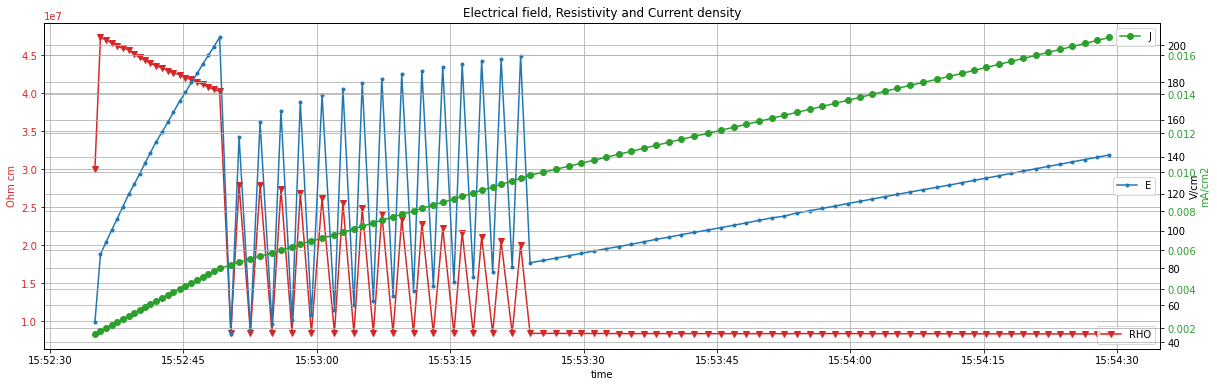

In [39]:
fig, ax1 = plt.subplots()
ax1.set_title("Electrical field, Resistivity and Current density")
ax1.set_xlabel('time')
ax1.set_ylabel('Ohm cm', color='C3')
ax1.tick_params(axis='y', labelcolor='C3')
ax1.plot(DT, RHO, 'v-', color='C3', label='RHO')
ax2 = ax1.twinx()
ax2.set_ylabel('V/cm')
ax2.plot(DT, E, '.-', label='E')
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
ax3 = ax1.twinx()

if not temp_const:
    ax3.set_ylabel('°K', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, T, 'o-', label='T', color='C2')
    ax3.legend(loc='upper right')

if not source_const:
    ax3.set_ylabel('mA/cm2', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, J, 'o-', label='J', color='C2')
    ax3.legend(loc='upper right')

ax1.legend(loc='lower right')
ax2.legend(loc='right')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

### Peaks detection

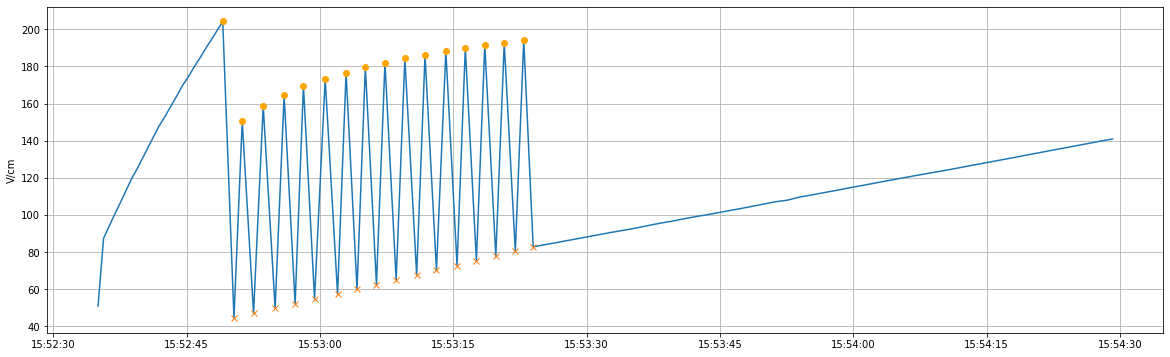

In [40]:
# Individuazione dei picchi
peaks, _ = signal.find_peaks(E, prominence=50)
# Larghezza, Ampiezza base, inizio e fine dei picchi
widths, values, start, end = signal.peak_widths(E, peaks, rel_height=1)
plt.plot(DT, E)
plt.plot(DT[peaks], E[peaks], 'o', c='orange')
istart = np.rint(start)
iend = np.rint(end)
plt.plot(DT[iend.astype(int)], E[iend.astype(int)], 'x')
#plt.hlines(values, DT[istart.astype(int)], DT[iend.astype(int)], color="C3")
plt.ylabel('V/cm')
plt.grid(True)

#### Starting and ending point of the peaks

In [41]:
print(f"First peak with value {E[peaks[0]]:.1f} V/cm, {RHO[peaks[0]]:.3e} Ohm cm at T:{T[peaks[0]]:.2f}°K and J:{J[peaks[0]]:.3e} mA/cm2\
\nLast peak  with value {E[peaks[-1]]:.1f} V/cm, {RHO[peaks[-1]]:.2e} Ohm cm at T:{T[peaks[-1]]:.2f}°K and J:{J[peaks[-1]]:.3e} mA/cm2")

First peak with value 204.2 V/cm, 4.021e+07 Ohm cm at T:97.27°K and J:5.078e-03 mA/cm2
Last peak  with value 194.1 V/cm, 2.00e+07 Ohm cm at T:97.18°K and J:9.694e-03 mA/cm2


#### Peaks amplitude

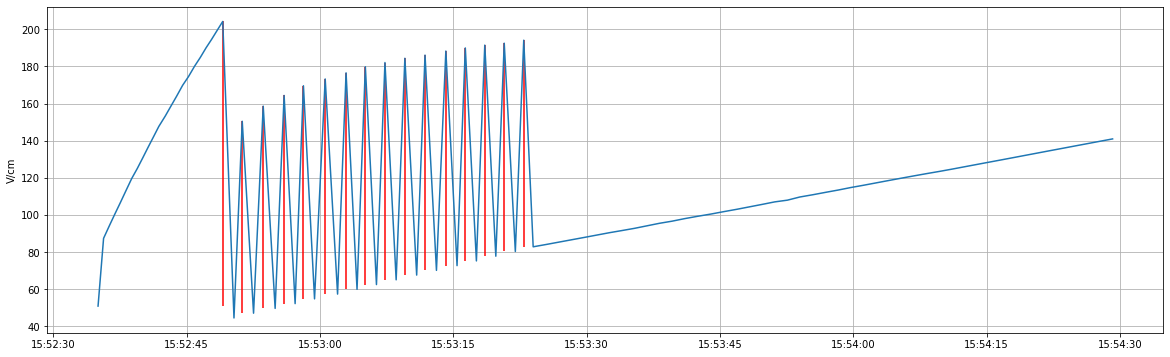

In [42]:
plt.plot(DT, E)
plt.vlines(DT[peaks], values, E[peaks], color='red')
plt.ylabel('V/cm')
plt.grid(True)

In [43]:
diff = E[peaks]-values
print(f"Minimum amplitude {np.min(diff):.1f} V/cm at T:{T[np.argmin(diff)]:.2f}°K and J:{J[np.argmin(diff)]:.3e} mA/cm2\
      \nMaximum amplitude {np.max(diff):.1f} at V/cm at T:{T[np.argmax(diff)]:.2f}°K and J:{J[np.argmax(diff)]:.3e} mA/cm2\
      \nAverage amplitude {np.mean(diff):.1f} V/cm")

Minimum amplitude 103.4 V/cm at T:97.30°K and J:1.846e-03 mA/cm2      
Maximum amplitude 153.4 at V/cm at T:97.31°K and J:1.693e-03 mA/cm2      
Average amplitude 116.3 V/cm


#### Time interval between peaks [ms]

Average 2257 milliseconds


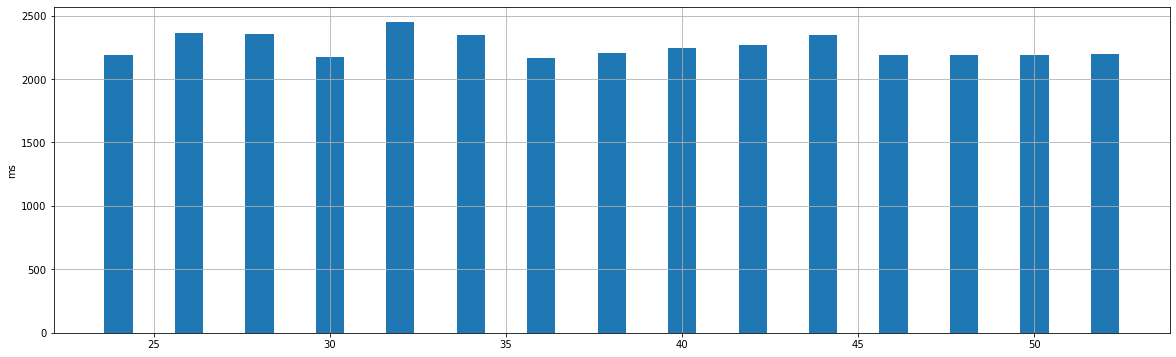

In [44]:
diff = np.ediff1d(DT[peaks].astype(dtype='datetime64[ms]'))
plt.ylabel('ms')
plt.bar(peaks[1:], diff.astype(int))
plt.grid(True)
print(f"Average {np.mean(diff)}")

## Analysis of the 4th slice

In [45]:
DT = datetime_data[slices[3]:slices[4]]
T = temperature_data[slices[3]:slices[4]]
J = c_density_data[slices[3]:slices[4]]
RHO = resistivity_data[slices[3]:slices[4]]
E = e_field_data[slices[3]:slices[4]]

In [46]:
temp_const = True
diff = np.max(T) - np.min(T)
if diff <= 0.1: 
    temp_msg = f"Temperature is constant: {T[0]:.2f}°K"   
elif diff <= 1.5: 
    temp_msg = f"Temperature is quite constant, average value: {np.average(T):.2f}°K difference between min and max {np.max(T) - np.min(T):.2f}°K"
else:
    temp_msg = f"Temperature span from {np.min(T):.2f}°K to {np.max(T):.2f}°K"
    temp_const = False
print(temp_msg)

Temperature is quite constant, average value: 96.67°K difference between min and max 0.53°K


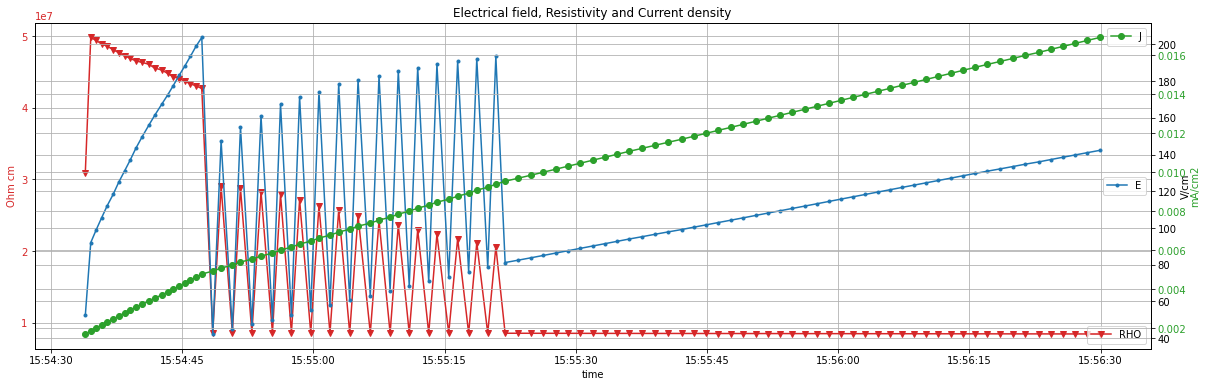

In [47]:
fig, ax1 = plt.subplots()
ax1.set_title("Electrical field, Resistivity and Current density")
ax1.set_xlabel('time')
ax1.set_ylabel('Ohm cm', color='C3')
ax1.tick_params(axis='y', labelcolor='C3')
ax1.plot(DT, RHO, 'v-', color='C3', label='RHO')
ax2 = ax1.twinx()
ax2.set_ylabel('V/cm')
ax2.plot(DT, E, '.-', label='E')
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
ax3 = ax1.twinx()

if not temp_const:
    ax3.set_ylabel('°K', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, T, 'o-', label='T', color='C2')
    ax3.legend(loc='upper right')

if not source_const:
    ax3.set_ylabel('mA/cm2', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, J, 'o-', label='J', color='C2')
    ax3.legend(loc='upper right')

ax1.legend(loc='lower right')
ax2.legend(loc='right')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

### Peaks detection

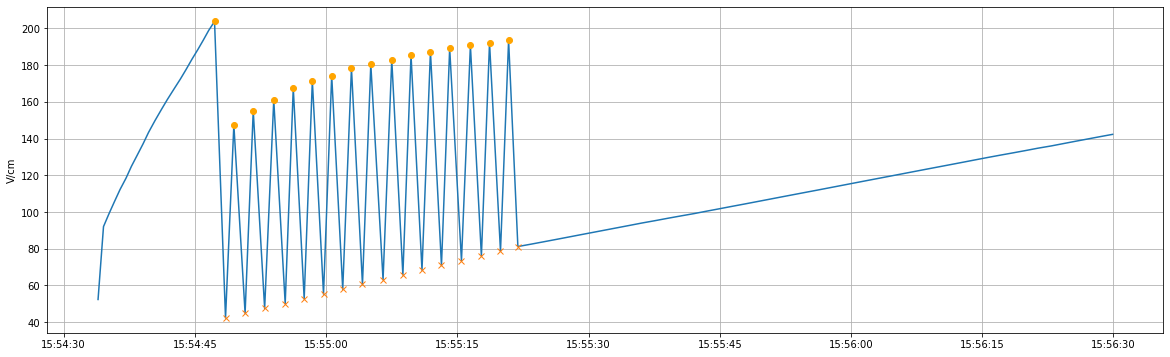

In [48]:
# Individuazione dei picchi
peaks, _ = signal.find_peaks(E, prominence=50)
# Larghezza, Ampiezza base, inizio e fine dei picchi
widths, values, start, end = signal.peak_widths(E, peaks, rel_height=1)
plt.plot(DT, E)
plt.plot(DT[peaks], E[peaks], 'o', c='orange')
istart = np.rint(start)
iend = np.rint(end)
plt.plot(DT[iend.astype(int)], E[iend.astype(int)], 'x')
#plt.hlines(values, DT[istart.astype(int)], DT[iend.astype(int)], color="C3")
plt.ylabel('V/cm')
plt.grid(True)

#### Starting and ending point of the peaks

In [49]:
print(f"First peak with value {E[peaks[0]]:.1f} V/cm, {RHO[peaks[0]]:.3e} Ohm cm at T:{T[peaks[0]]:.2f}°K and J:{J[peaks[0]]:.3e} mA/cm2\
\nLast peak  with value {E[peaks[-1]]:.1f} V/cm, {RHO[peaks[-1]]:.2e} Ohm cm at T:{T[peaks[-1]]:.2f}°K and J:{J[peaks[-1]]:.3e} mA/cm2")

First peak with value 203.8 V/cm, 4.271e+07 Ohm cm at T:96.85°K and J:4.770e-03 mA/cm2
Last peak  with value 193.5 V/cm, 2.06e+07 Ohm cm at T:96.69°K and J:9.386e-03 mA/cm2


#### Peaks amplitude

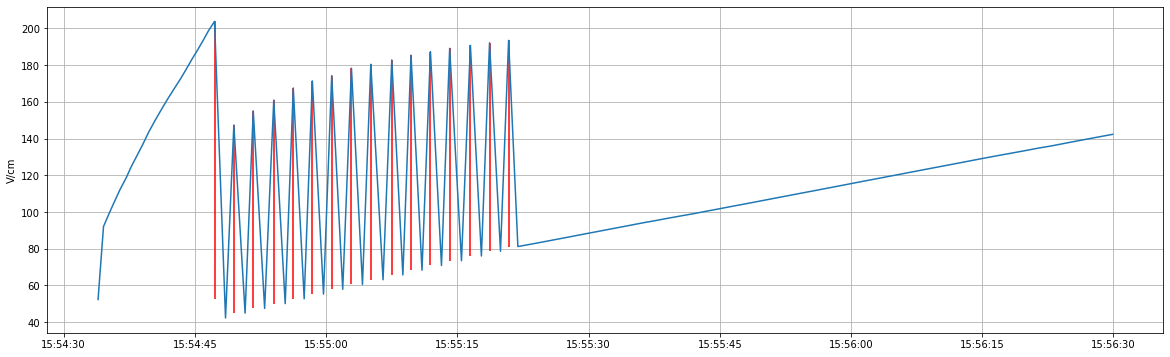

In [50]:
plt.plot(DT, E)
plt.vlines(DT[peaks], values, E[peaks], color='red')
plt.ylabel('V/cm')
plt.grid(True)

In [51]:
diff = E[peaks]-values
print(f"Minimum amplitude {np.min(diff):.1f} V/cm at T:{T[np.argmin(diff)]:.2f}°K and J:{J[np.argmin(diff)]:.3e} mA/cm2\
      \nMaximum amplitude {np.max(diff):.1f} at V/cm at T:{T[np.argmax(diff)]:.2f}°K and J:{J[np.argmax(diff)]:.3e} mA/cm2\
      \nAverage amplitude {np.mean(diff):.1f} V/cm")

Minimum amplitude 102.5 V/cm at T:96.91°K and J:1.846e-03 mA/cm2      
Maximum amplitude 151.4 at V/cm at T:96.91°K and J:1.693e-03 mA/cm2      
Average amplitude 116.4 V/cm


#### Time interval between peaks [ms]

Average 2240 milliseconds


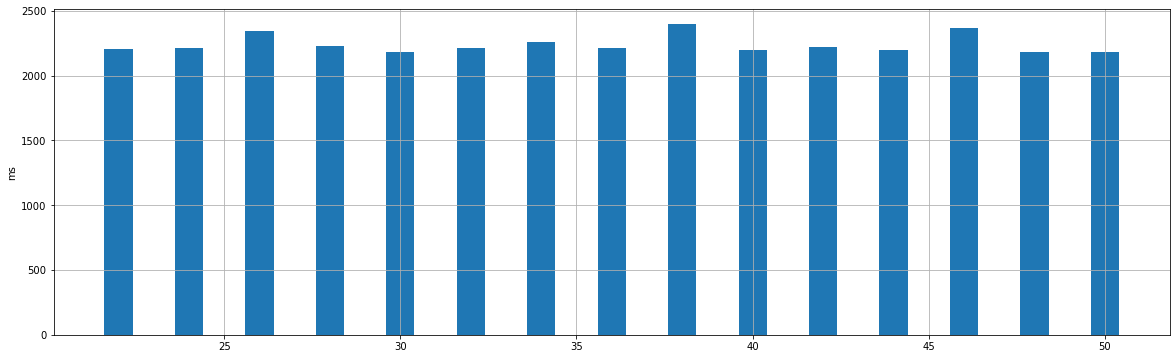

In [52]:
diff = np.ediff1d(DT[peaks].astype(dtype='datetime64[ms]'))
plt.ylabel('ms')
plt.bar(peaks[1:], diff.astype(int))
plt.grid(True)
print(f"Average {np.mean(diff)}")

## Analysis of the last slice

In [53]:
DT = datetime_data[slices[-1]:-1]
T = temperature_data[slices[-1]:-1]
J = c_density_data[slices[-1]:-1]
RHO = resistivity_data[slices[-1]:-1]
E = e_field_data[slices[-1]:-1]

In [54]:
temp_const = True
diff = np.max(T) - np.min(T)
if diff <= 0.1: 
    temp_msg = f"Temperature is constant: {T[0]:.2f}°K"   
elif diff <= 1.5: 
    temp_msg = f"Temperature is quite constant, average value: {np.average(T):.2f}°K difference between min and max {np.max(T) - np.min(T):.2f}°K"
else:
    temp_msg = f"Temperature span from {np.min(T):.2f}°K to {np.max(T):.2f}°K"
    temp_const = False
print(temp_msg)

Temperature is quite constant, average value: 88.28°K difference between min and max 0.55°K


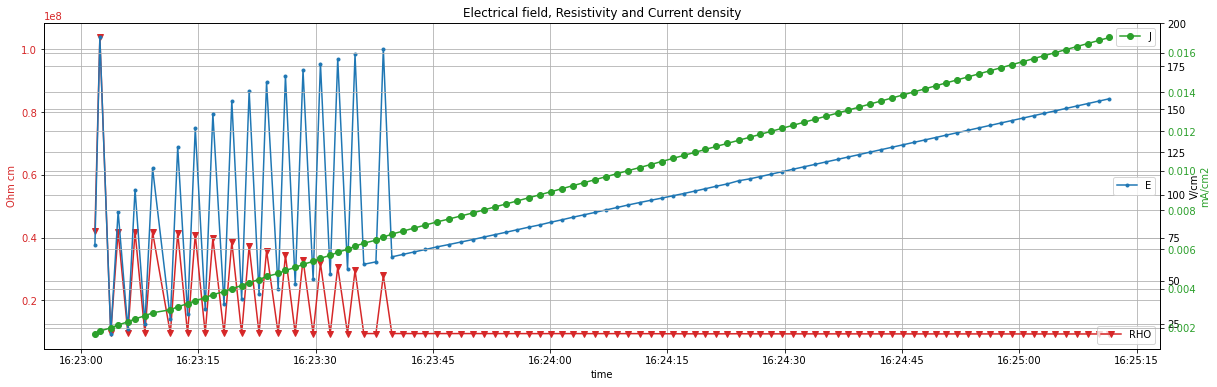

In [55]:
fig, ax1 = plt.subplots()
ax1.set_title("Electrical field, Resistivity and Current density")
ax1.set_xlabel('time')
ax1.set_ylabel('Ohm cm', color='C3')
ax1.tick_params(axis='y', labelcolor='C3')
ax1.plot(DT, RHO, 'v-', color='C3', label='RHO')
ax2 = ax1.twinx()
ax2.set_ylabel('V/cm')
ax2.plot(DT, E, '.-', label='E')
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
ax3 = ax1.twinx()

if not temp_const:
    ax3.set_ylabel('°K', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, T, 'o-', label='T', color='C2')
    ax3.legend(loc='upper right')

if not source_const:
    ax3.set_ylabel('mA/cm2', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, J, 'o-', label='J', color='C2')
    ax3.legend(loc='upper right')

ax1.legend(loc='lower right')
ax2.legend(loc='right')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

### Peaks detection

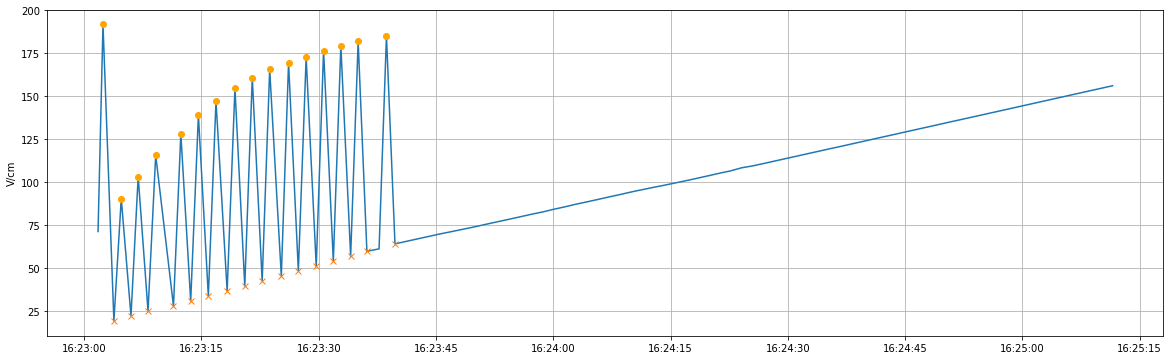

In [56]:
# Individuazione dei picchi
peaks, _ = signal.find_peaks(E, prominence=50)
# Larghezza, Ampiezza base, inizio e fine dei picchi
widths, values, start, end = signal.peak_widths(E, peaks, rel_height=1)
plt.plot(DT, E)
plt.plot(DT[peaks], E[peaks], 'o', c='orange')
istart = np.rint(start)
iend = np.rint(end)
plt.plot(DT[iend.astype(int)], E[iend.astype(int)], 'x')
#plt.hlines(values, DT[istart.astype(int)], DT[iend.astype(int)], color="C3")
plt.ylabel('V/cm')
plt.grid(True)

#### Starting and ending point of the peaks

In [57]:
print(f"First peak with value {E[peaks[0]]:.1f} V/cm, {RHO[peaks[0]]:.3e} Ohm cm at T:{T[peaks[0]]:.2f}°K and J:{J[peaks[0]]:.3e} mA/cm2\
\nLast peak  with value {E[peaks[-1]]:.1f} V/cm, {RHO[peaks[-1]]:.2e} Ohm cm at T:{T[peaks[-1]]:.2f}°K and J:{J[peaks[-1]]:.3e} mA/cm2")

First peak with value 191.7 V/cm, 1.038e+08 Ohm cm at T:88.61°K and J:1.846e-03 mA/cm2
Last peak  with value 185.1 V/cm, 2.80e+07 Ohm cm at T:88.39°K and J:6.617e-03 mA/cm2


#### Peaks amplitude

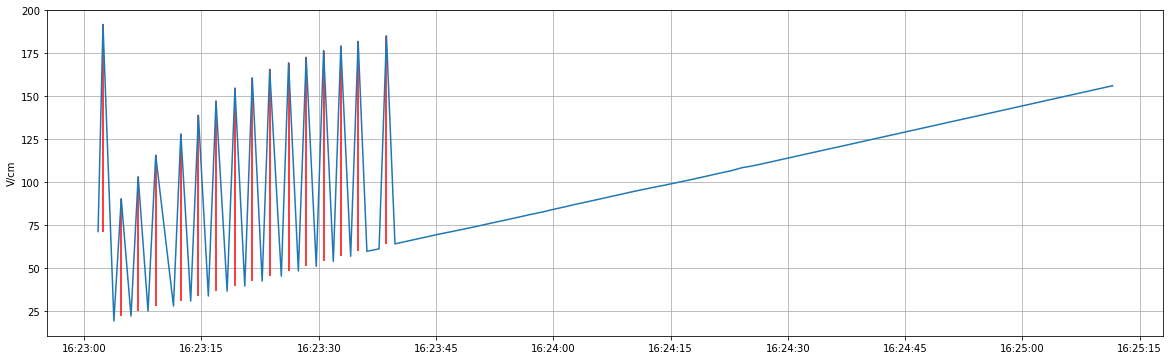

In [58]:
plt.plot(DT, E)
plt.vlines(DT[peaks], values, E[peaks], color='red')
plt.ylabel('V/cm')
plt.grid(True)

In [59]:
diff = E[peaks]-values
print(f"Minimum amplitude {np.min(diff):.1f} V/cm at T:{T[np.argmin(diff)]:.2f}°K and J:{J[np.argmin(diff)]:.3e} mA/cm2\
      \nMaximum amplitude {np.max(diff):.1f} at V/cm at T:{T[np.argmax(diff)]:.2f}°K and J:{J[np.argmax(diff)]:.3e} mA/cm2\
      \nAverage amplitude {np.mean(diff):.1f} V/cm")

Minimum amplitude 68.4 V/cm at T:88.61°K and J:1.846e-03 mA/cm2      
Maximum amplitude 122.8 at V/cm at T:88.53°K and J:3.539e-03 mA/cm2      
Average amplitude 109.7 V/cm


#### Time interval between peaks [ms]

Average 2417 milliseconds


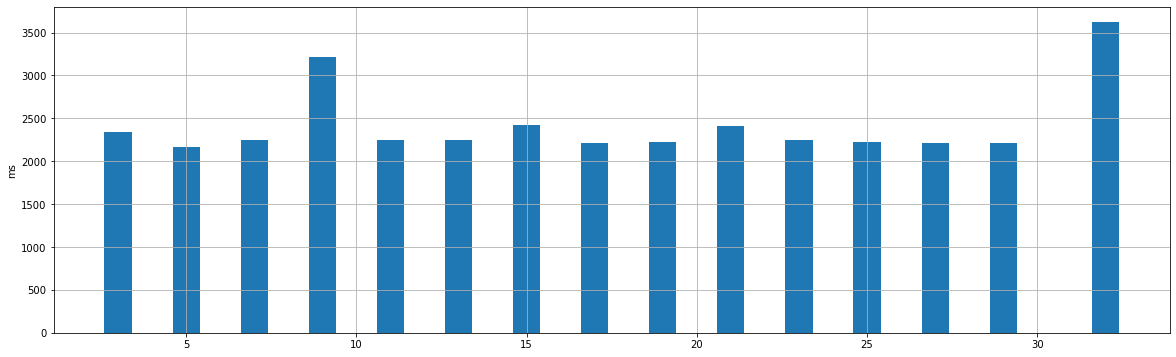

In [60]:
diff = np.ediff1d(DT[peaks].astype(dtype='datetime64[ms]'))
plt.ylabel('ms')
plt.bar(peaks[1:], diff.astype(int))
plt.grid(True)
print(f"Average {np.mean(diff)}")